# TeamVoice를 분석해본다.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [17]:
file1 = '../../nmb_data/teamvoice/clear/testvoice_F1(clear).wav'
file2 = '../../nmb_data/teamvoice/clear/testvoice_F1_high(clear).wav'
file3 = '../../nmb_data/teamvoice/clear/testvoice_M2(claer).wav' 

In [18]:
# load audio files with librosa
f1, sr = librosa.load(file1)
f1_high, _ = librosa.load(file2)
m2, _ = librosa.load(file3)

# Visualising audio signal in the time domain
기본적인 음성 형태 보기

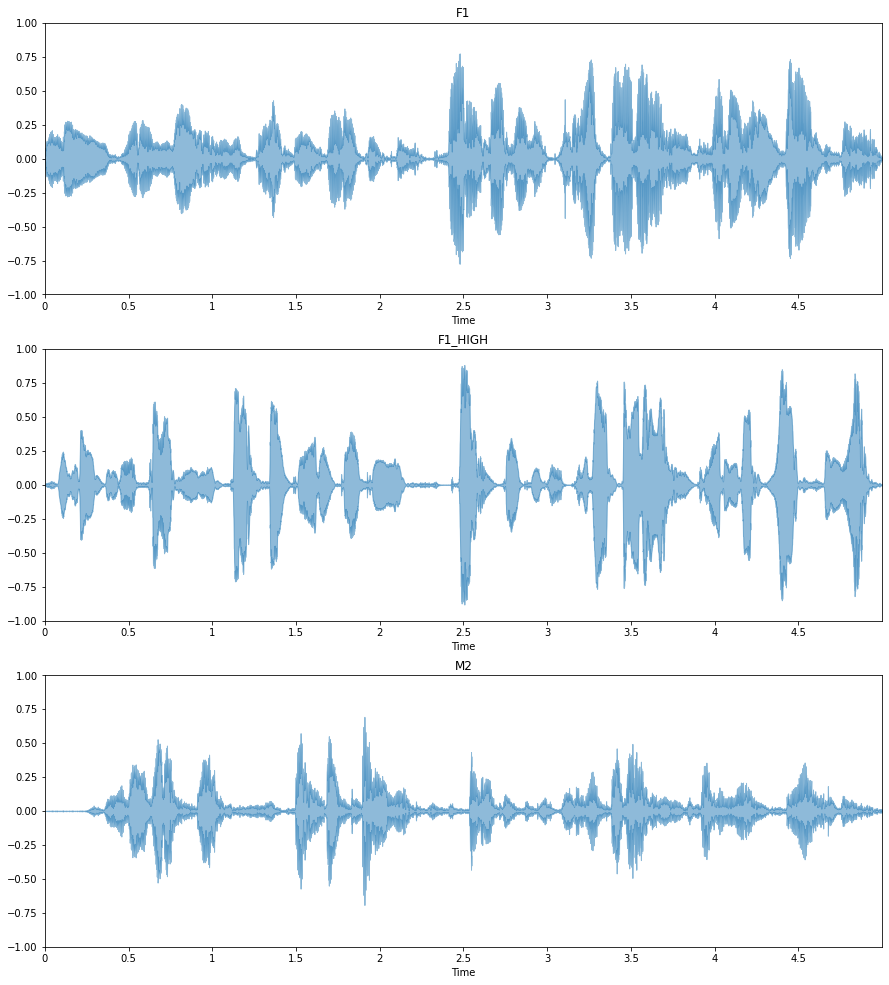

In [19]:
# visualize waveforms

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveplot(f1, alpha=0.5)
plt.ylim((-1, 1))
plt.title("F1")

plt.subplot(3, 1, 2)
librosa.display.waveplot(f1_high, alpha=0.5)
plt.ylim((-1, 1))
plt.title("F1_HIGH")

plt.subplot(3, 1, 3)
librosa.display.waveplot(m2, alpha=0.5)
plt.ylim((-1, 1))
plt.title("M2")

plt.show()

가로축 : 시간    
세로축 : Amplitude    
(남녀의 차이를 찾기는 어렵다.)    

-----------

# Calculating amplitude envelope
각 프레임에 있는 소리 중 가장 큰 amplitude를 표시한다.

In [21]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

# number of frames in amplitude envelope
ae_f1 = amplitude_envelope(f1, FRAME_SIZE, HOP_LENGTH)
ae_f1_high = amplitude_envelope(f1_high, FRAME_SIZE, HOP_LENGTH)
ae_m2 = amplitude_envelope(m2, FRAME_SIZE, HOP_LENGTH)

print(len(ae_f1)) 
print(len(ae_f1_high)) 
print(len(ae_m2)) 
# # of frames

216
216
216


프레임의 개수만큼 Amplitude envelope가 표시된다.

# Visualising amplitude envelope

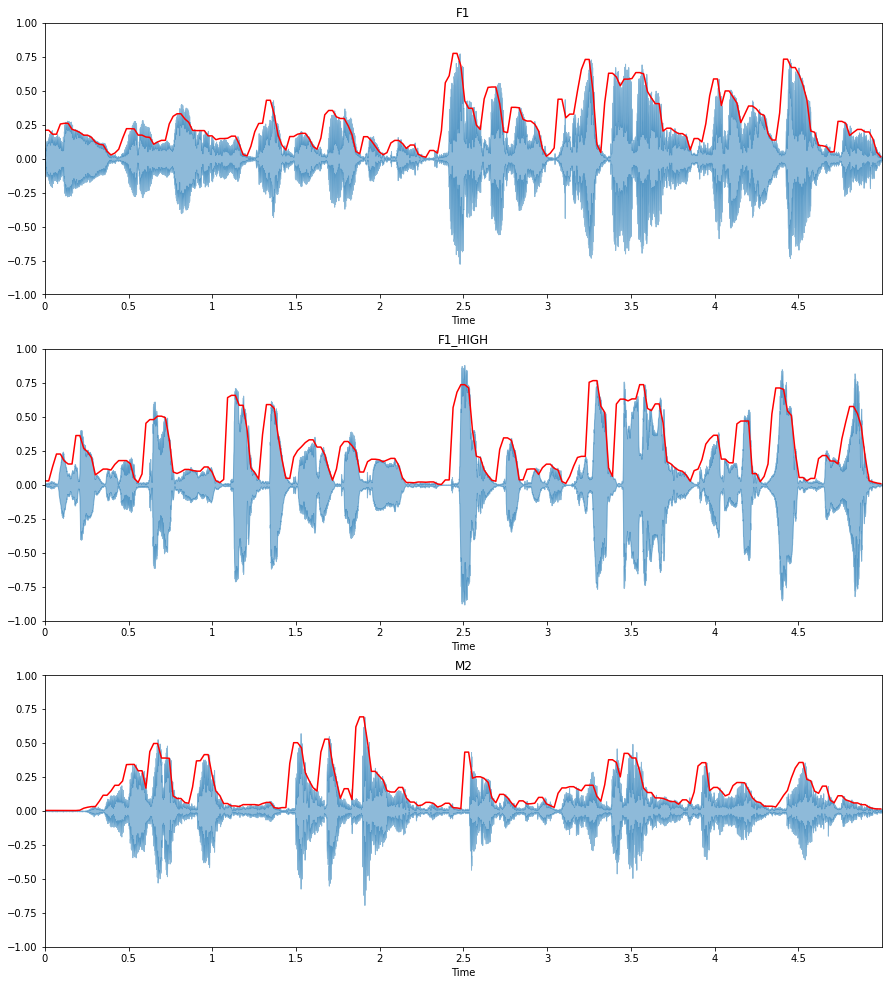

In [22]:
frames = range(len(ae_f1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(f1, alpha=0.5)
plt.plot(t, ae_f1, color="r")
plt.ylim((-1, 1))
plt.title("F1")

plt.subplot(3, 1, 2)
librosa.display.waveplot(f1_high, alpha=0.5)
plt.plot(t, ae_f1_high, color="r")
plt.ylim((-1, 1))
plt.title("F1_HIGH")

plt.subplot(3, 1, 3)
librosa.display.waveplot(m2, alpha=0.5)
plt.plot(t, ae_m2, color="r")
plt.ylim((-1, 1))
plt.title("M2")

plt.show()

음파에서 각 프레임 별로 가장 높은 Amplitude에 빨간색 선이 그려진다.    
이 역시, 남녀를 구분하기는 힘들다.

---------

# Root-mean-squared energy with Librosa
- energy : Indicator of loudness (Amplitude를 나타내는 지표로 사용하는 것 같음)
- RMS : 제곱평균제곱근 
    + 오디오 샘플 -> 제곱 -> 제곱한 것들의 합 -> 합한 것들을 개수로 나눔(평균) -> 루트

In [24]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

rms_f1 = librosa.feature.rms(f1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_f1_high = librosa.feature.rms(f1_high, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_m2 = librosa.feature.rms(m2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(rms_f1.shape)
print(rms_f1_high.shape)
print(rms_m2.shape)


(216,)
(216,)
(216,)


# Visualise RMSE + waveform

(216,)


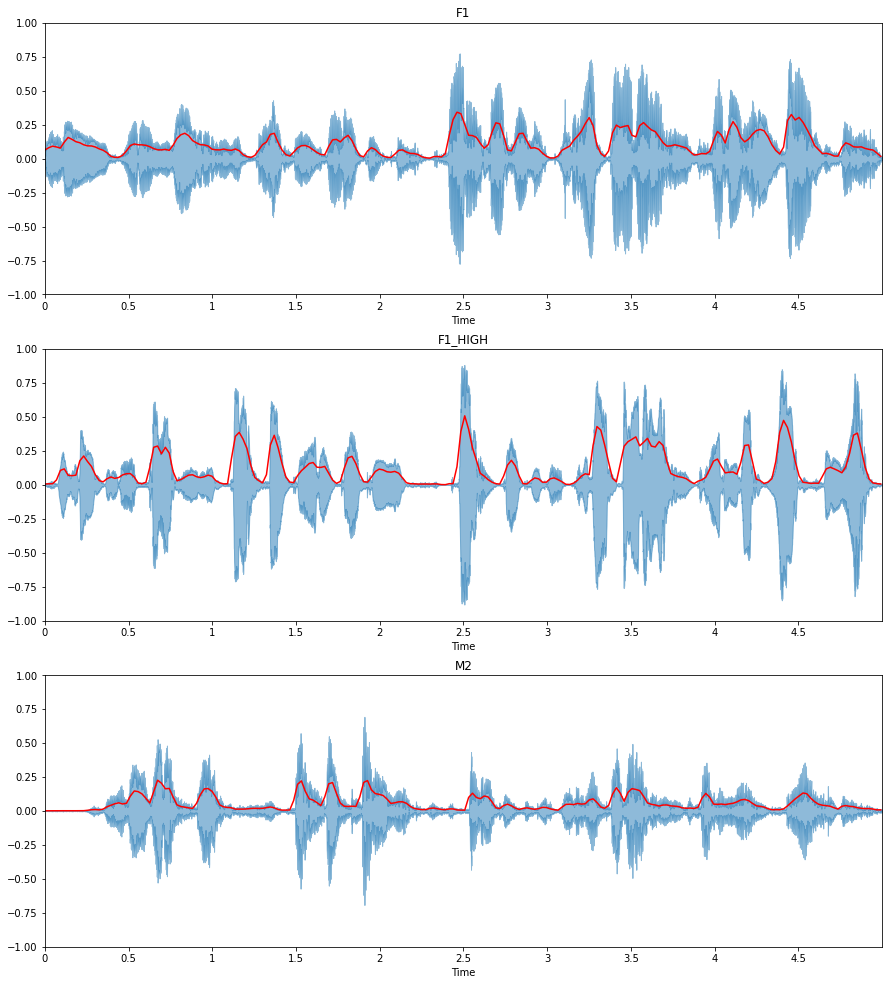

In [25]:
frames = range(len(rms_f1))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
print(t.shape)

# rms energy is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(f1, alpha=0.5)
plt.plot(t, rms_f1, color="r")
plt.ylim((-1, 1))
plt.title("F1")

plt.subplot(3, 1, 2)
librosa.display.waveplot(f1_high, alpha=0.5)
plt.plot(t, rms_f1_high, color="r")
plt.ylim((-1, 1))
plt.title("F1_HIGH")

plt.subplot(3, 1, 3)
librosa.display.waveplot(m2, alpha=0.5)
plt.plot(t, rms_m2, color="r")
plt.ylim((-1, 1))
plt.title("M2")

plt.show()

각 음파의 프레임 별로 RMS에 해당하는 곳에 빨간색 선이 그려진다.

----

# Zero-crossing rate with Librosa
음성이 Amplitude '0'을 몇 번 지나는 지 알려준다.    
noise가 일반적인 voice보다 zero-crossing rate가 더 높다.

In [27]:
zcr_f1 = librosa.feature.zero_crossing_rate(f1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_f1_high = librosa.feature.zero_crossing_rate(f1_high, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_m2 = librosa.feature.zero_crossing_rate(m2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(zcr_f1.size)
print(zcr_f1_high.size)
print(zcr_m2.size)

216
216
216


# Visualise zero-crossing rate with Librosa

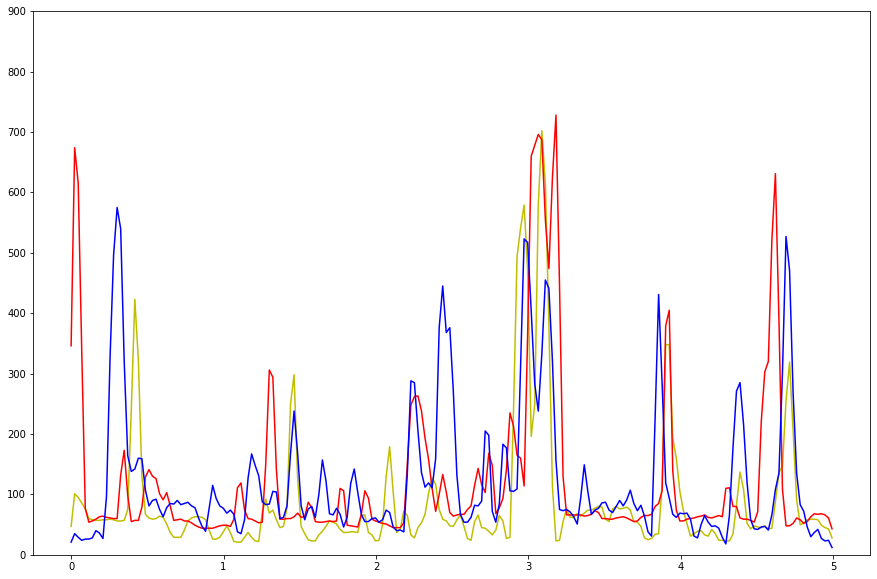

In [31]:
# actual number of zero crossing

plt.figure(figsize=(15, 10))

plt.plot(t, zcr_f1 * FRAME_SIZE, color="y")
plt.plot(t, zcr_f1_high * FRAME_SIZE, color="r")
plt.plot(t, zcr_m2 * FRAME_SIZE, color="b")
plt.ylim(0, 900)
plt.show()

가로축 : 시간    
세로축 : '0'을 지난 횟수

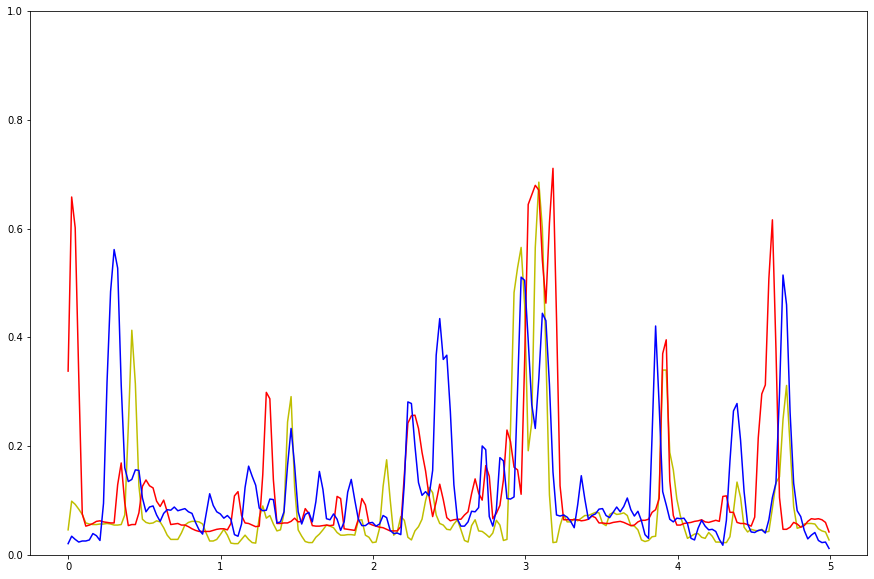

In [33]:
# zero crossing rate
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_f1, color="y")
plt.plot(t, zcr_f1_high , color="r")
plt.plot(t, zcr_m2 , color="b")
plt.ylim(0, 1)
plt.show()

가로축 : 시간    
세로축 : '0'을 지난 비율